In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [7]:
# Load the dataset
file_path = r'C:\Users\bhard\OneDrive\Desktop\My all Projects\Exploratory Data Analysis (EDA) on Retail Sales Data\avocado.csv'
df = pd.read_csv(file_path)

In [8]:
# Display the first few rows
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Alba

In [9]:
# Display column names to find the correct column
print("\nColumn Names:")
print(df.columns)


Column Names:
Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')


In [10]:
# Replace 'correct_column_name' with the actual column name you want to analyze
sales_column = 'Total Volume'  # Example: Replace with the correct column name for sales data

In [11]:
# Data Info
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB
None


In [12]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


In [13]:
# Descriptive Statistics
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
         Unnamed: 0  AveragePrice  Total Volume          4046          4225  \
count  18249.000000  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04   
mean      24.232232      1.405978  8.506440e+05  2.930084e+05  2.951546e+05   
std       15.481045      0.402677  3.453545e+06  1.264989e+06  1.204120e+06   
min        0.000000      0.440000  8.456000e+01  0.000000e+00  0.000000e+00   
25%       10.000000      1.100000  1.083858e+04  8.540700e+02  3.008780e+03   
50%       24.000000      1.370000  1.073768e+05  8.645300e+03  2.906102e+04   
75%       38.000000      1.660000  4.329623e+05  1.110202e+05  1.502069e+05   
max       52.000000      3.250000  6.250565e+07  2.274362e+07  2.047057e+07   

               4770    Total Bags    Small Bags    Large Bags    XLarge Bags  \
count  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000   
mean   2.283974e+04  2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   
std    1.074641e+05  9.

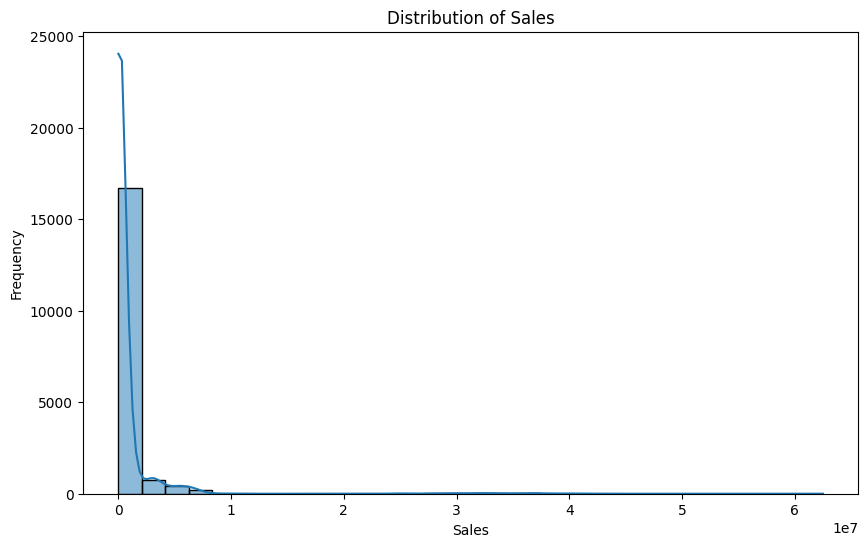

In [14]:
# Distribution Analysis
plt.figure(figsize=(10, 6))
sns.histplot(df[sales_column], kde=True, bins=30)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

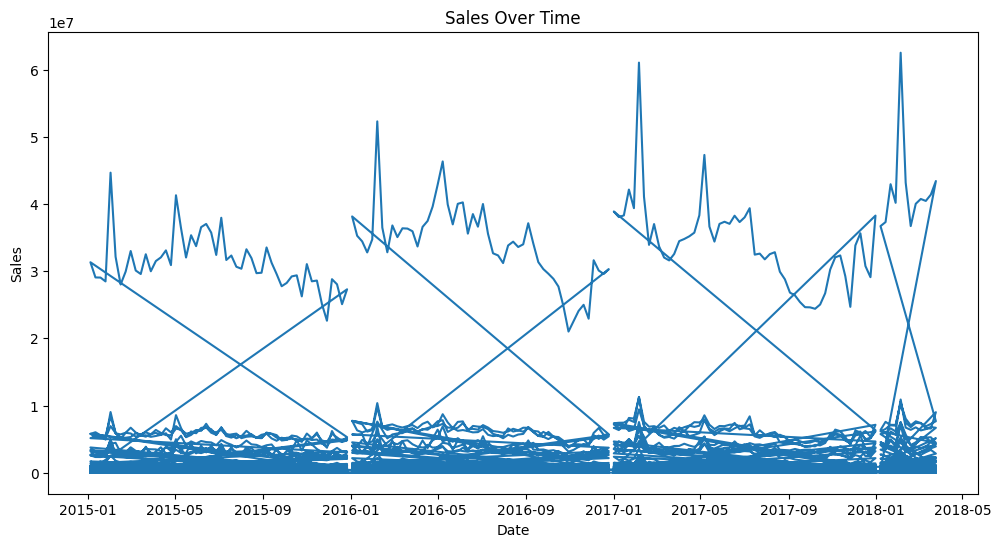

In [15]:
# Time Series Analysis (if time-related data is available)
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    
    plt.figure(figsize=(12, 6))
    plt.plot(df[sales_column])
    plt.title('Sales Over Time')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.show()

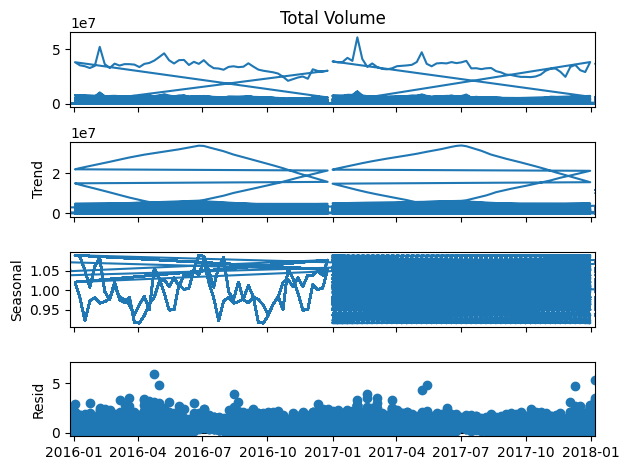

In [18]:
# Decompose time series into trend, seasonal, and residual components
decomposition = seasonal_decompose(df[sales_column], model='multiplicative', period=52)
decomposition.plot()
plt.show()

In [19]:
# Customer Analysis (if customer data is available)
if 'customer_id' in df.columns:
    customer_sales = df.groupby('customer_id').agg({
        sales_column: ['sum', 'mean', 'count']
    })
    customer_sales.columns = ['Total Sales', 'Average Sales', 'Purchase Count']
    print("\nCustomer Sales Analysis:")
    print(customer_sales.head())

    plt.figure(figsize=(10, 6))
    sns.histplot(customer_sales['Total Sales'], kde=True, bins=30)
    plt.title('Distribution of Total Sales by Customer')
    plt.xlabel('Total Sales')
    plt.ylabel('Frequency')
    plt.show()

In [20]:
# Product Analysis (if product data is available)
if 'product_id' in df.columns:
    product_sales = df.groupby('product_id').agg({
        sales_column: ['sum', 'mean', 'count']
    })
    product_sales.columns = ['Total Sales', 'Average Sales', 'Sales Count']
    print("\nProduct Sales Analysis:")
    print(product_sales.head())

    plt.figure(figsize=(12, 6))
    sns.barplot(x=product_sales.index, y=product_sales['Total Sales'].values)
    plt.title('Total Sales by Product')
    plt.xlabel('Product ID')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=90)
    plt.show()

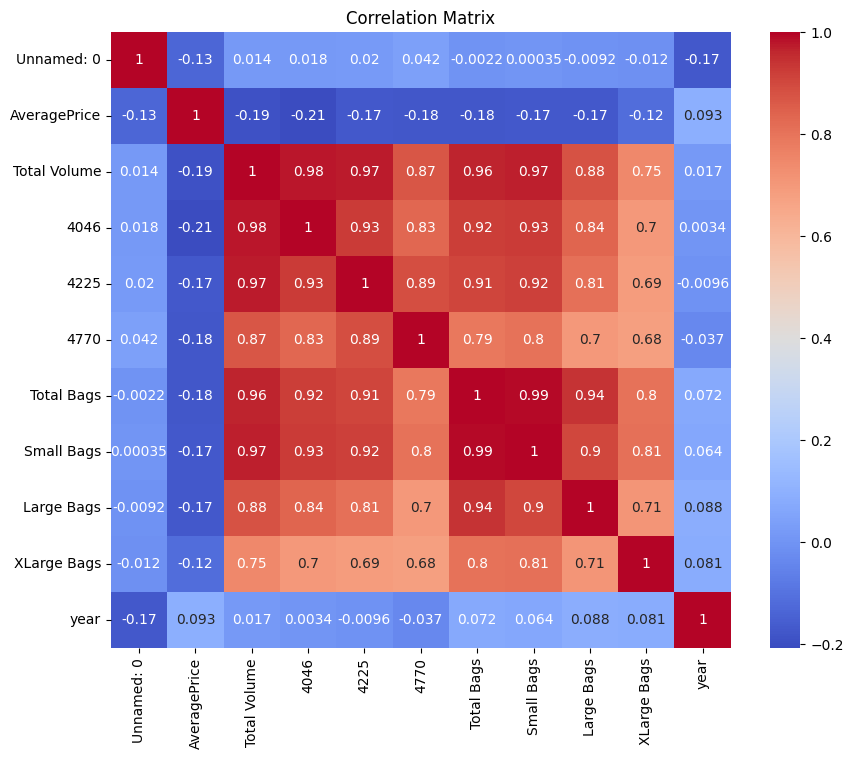

In [22]:
# Correlation Matrix
# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Check if the dataframe has numeric data
if not numeric_df.empty:
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()
else:
    print("No numeric data available for correlation matrix.")

In [23]:
# Recommendations based on insights
print("\nRecommendations:")
print("1. Consider promoting products with the highest sales to maximize revenue.")
print("2. Analyze time periods with low sales and investigate potential causes.")
print("3. Implement targeted marketing strategies based on customer purchasing behavior.")
print("4. Optimize inventory management by stocking high-demand products identified through the EDA.")


Recommendations:
1. Consider promoting products with the highest sales to maximize revenue.
2. Analyze time periods with low sales and investigate potential causes.
3. Implement targeted marketing strategies based on customer purchasing behavior.
4. Optimize inventory management by stocking high-demand products identified through the EDA.


In [24]:
# Save cleaned dataset (optional)
cleaned_file_path = r'C:\Users\bhard\OneDrive\Desktop\My all Projects\Exploratory Data Analysis (EDA) on Retail Sales Data\avocado_cleaned.csv'
df.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned dataset saved to {cleaned_file_path}")


Cleaned dataset saved to C:\Users\bhard\OneDrive\Desktop\My all Projects\Exploratory Data Analysis (EDA) on Retail Sales Data\avocado_cleaned.csv
